### 問題1
データの前処理（正規化）を行ってください．  
具体的には4つ  
- StandardScaler
- RobustScaler
- MinMaxScaler
- Normalizer  

これらの処理後のデータをみて何が起きてるか理解してください．

In [11]:
import numpy as np

array = np.random.uniform(-10, 10, size=(100, 1))
print(array[:5])

[[ 7.16824689]
 [-6.98552151]
 [-8.18600046]
 [ 3.6041236 ]
 [ 8.3706908 ]]


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()
# scaler = Normalizer()

In [20]:
scaler.fit(array)
array_scaled = scaler.transform(array)
print(array_scaled[:5])

[[ 1.2972576 ]
 [-1.16380315]
 [-1.37254273]
 [ 0.67752696]
 [ 1.50633885]]


### 問題2
下記データXにPCAを適用して，縦軸を第1成分，横軸を第2成分として，表示してください．

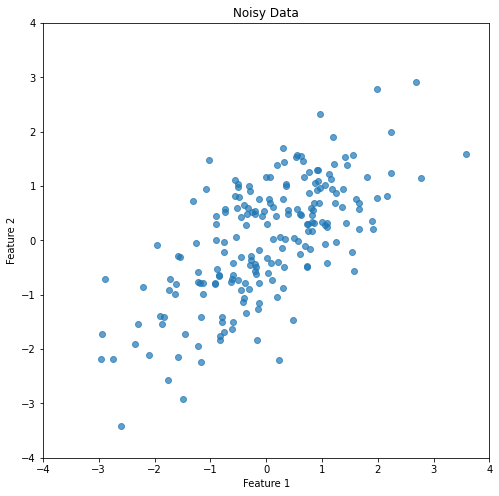

In [40]:
import matplotlib.pyplot as plt

# 元のデータセット X の作成
np.random.seed(0)
n_samples = 200
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  
X = np.random.multivariate_normal(mean, cov, n_samples)

# ランダムノイズを加える
noise_factor = 0.5  # ノイズの大きさを調整するファクター
noise = np.random.normal(0, noise_factor, X.shape)
X_noisy = X + noise

# ノイズを加えたデータセット X_noisy を表示
plt.figure(figsize=(8, 8))
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], alpha=0.7)
plt.title("Noisy Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-4, 4)  
plt.ylim(-4, 4)
plt.show()

In [35]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X_noisy)
X_scaled = scaler.transform(X_noisy)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

(-4.0, 4.0)

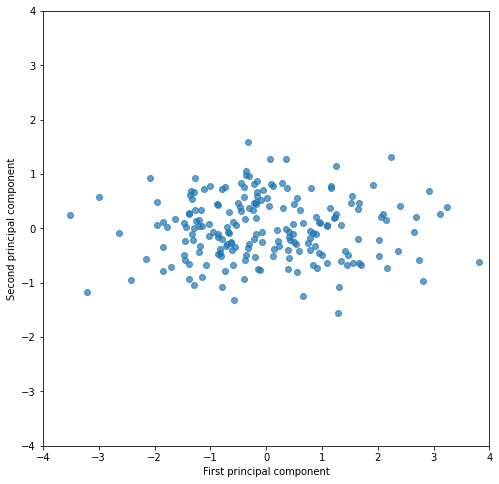

In [41]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.xlim(-4, 4)  
plt.ylim(-4, 4)

(-4.0, 4.0)

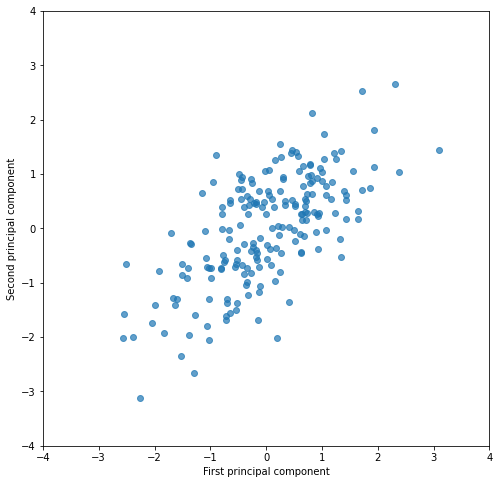

In [42]:
# 逆変換されたデータを確認
X_inverse = pca.inverse_transform(X_pca)
plt.figure(figsize=(8, 8))
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], alpha=0.7)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.xlim(-4, 4)  
plt.ylim(-4, 4)

### 問題3
KMeansでクラスタリングしてください．  
グループは2つです．

In [59]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
print(X.shape)
print(y)

(200, 2)
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


Text(0, 0.5, 'Feature 1')

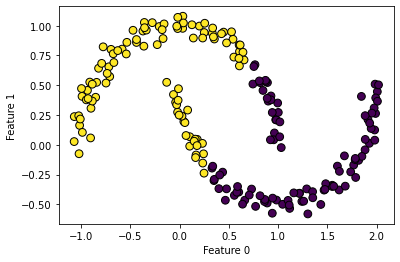

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 問題4
上のmake_moonsをうまくクラスタリングする方法を考えて実装してください．

Text(0, 0.5, 'Feature 1')

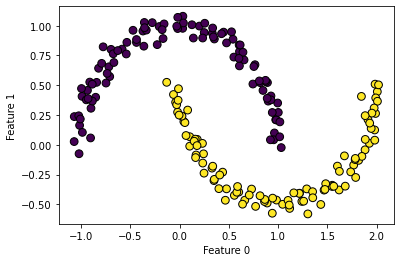

In [60]:
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
dbscan.fit(X_scaled)

y_dbscan = dbscan.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=60, edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")